<a href="https://colab.research.google.com/github/tahminahasan/Water-Quality/blob/main/SMOTEENN_water_RF_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Missing values:
 ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64


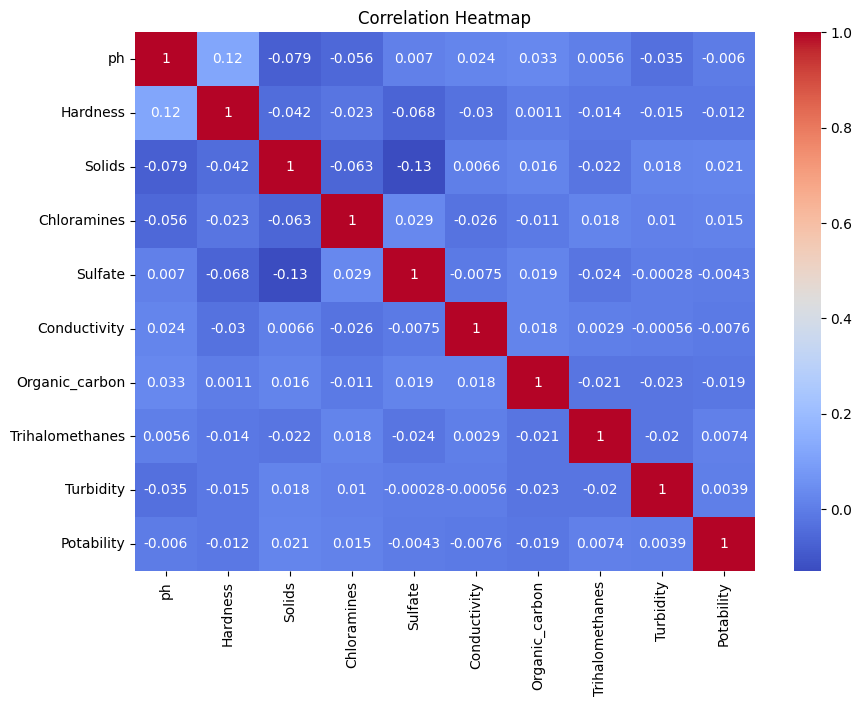

✅ Cleaned dataset saved as cleaned_water_potability.csv


In [1]:
# 1. Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy import stats

# 2. Load dataset
df = pd.read_csv("water_potability.csv")

# 3. Check for missing values
print("Missing values:\n", df.isnull().sum())

# 4. Handle missing values using mean (you can switch to median if outliers are an issue)
df.fillna(df.mean(), inplace=True)

# 5. Detect and remove outliers using z-score
z_scores = np.abs(stats.zscore(df.select_dtypes(include=[np.number])))
df = df[(z_scores < 3).all(axis=1)]

# 6. Correlation heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# 7. Separate features and label
X = df.drop("Potability", axis=1)
y = df["Potability"]

# 8. Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 9. Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# 10. Save the cleaned dataset
cleaned_df = pd.DataFrame(X_scaled, columns=X.columns)
cleaned_df["Potability"] = y.values
cleaned_df.to_csv("cleaned_water_potability.csv", index=False)
print("✅ Cleaned dataset saved as cleaned_water_potability.csv")


In [2]:
pip install imbalanced-learn


In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE, ADASYN, BorderlineSMOTE, SVMSMOTE, KMeansSMOTE
from imblearn.under_sampling import RandomUnderSampler, TomekLinks, NearMiss
from imblearn.combine import SMOTEENN, SMOTETomek

# Load dataset
df = pd.read_csv("water_potability.csv")

# Handle missing values using median (robust against outliers)
df.fillna(df.median(numeric_only=True), inplace=True)

# Separate features and target
X = df.drop("Potability", axis=1)
y = df["Potability"]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Define resampling techniques
resampling_methods = {
    "SMOTE": SMOTE(random_state=42),
    "ADASYN": ADASYN(random_state=42),
    "BorderlineSMOTE": BorderlineSMOTE(random_state=42),
    "SVMSMOTE": SVMSMOTE(random_state=42),

    "RandomUnderSampler": RandomUnderSampler(random_state=42),
    "TomekLinks": TomekLinks(),
    "NearMiss": NearMiss(),
    "SMOTEENN": SMOTEENN(random_state=42),
    "SMOTETomek": SMOTETomek(random_state=42),
}

# Apply resampling and save to new CSVs
for name, method in resampling_methods.items():
    try:
        X_res, y_res = method.fit_resample(X_train, y_train)
        X_res_df = pd.DataFrame(X_res, columns=X.columns)
        y_res_df = pd.DataFrame(y_res, columns=["Potability"])
        resampled_df = pd.concat([X_res_df, y_res_df], axis=1)
        resampled_df.to_csv(f"resampled_{name}.csv", index=False)
        print(f"✅ Saved: resampled_{name}.csv")
    except Exception as e:
        print(f"⚠️ {name} failed: {e}")


✅ Saved: resampled_SMOTE.csv
✅ Saved: resampled_ADASYN.csv
✅ Saved: resampled_BorderlineSMOTE.csv
✅ Saved: resampled_SVMSMOTE.csv
✅ Saved: resampled_RandomUnderSampler.csv
✅ Saved: resampled_TomekLinks.csv
✅ Saved: resampled_NearMiss.csv
✅ Saved: resampled_SMOTEENN.csv
✅ Saved: resampled_SMOTETomek.csv


In [5]:
import pandas as pd

# List of resampled dataset filenames
datasets = [
    "resampled_SMOTE.csv",
    "resampled_ADASYN.csv",
    "resampled_BorderlineSMOTE.csv",
    "resampled_SVMSMOTE.csv",
    "resampled_RandomUnderSampler.csv",
    "resampled_TomekLinks.csv",
    "resampled_NearMiss.csv",
    "resampled_SMOTEENN.csv",
    "resampled_SMOTETomek.csv"
]

# Loop over each dataset
for file in datasets:
    print(f"\n📂 Dataset: {file}")

    # Load the dataset
    df = pd.read_csv(file)

    # Get number of rows and columns
    rows, cols = df.shape
    print(f"📊 Rows: {rows}, Columns: {cols}")



📂 Dataset: resampled_SMOTE.csv
📊 Rows: 3196, Columns: 10

📂 Dataset: resampled_ADASYN.csv
📊 Rows: 3223, Columns: 10

📂 Dataset: resampled_BorderlineSMOTE.csv
📊 Rows: 3196, Columns: 10

📂 Dataset: resampled_SVMSMOTE.csv
📊 Rows: 3196, Columns: 10

📂 Dataset: resampled_RandomUnderSampler.csv
📊 Rows: 2044, Columns: 10

📂 Dataset: resampled_TomekLinks.csv
📊 Rows: 2432, Columns: 10

📂 Dataset: resampled_NearMiss.csv
📊 Rows: 2044, Columns: 10

📂 Dataset: resampled_SMOTEENN.csv
📊 Rows: 1296, Columns: 10

📂 Dataset: resampled_SMOTETomek.csv
📊 Rows: 3030, Columns: 10


RF



📂 Dataset: resampled_SMOTEENN.csv
✅ Accuracy: 0.8269

📊 Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.68      0.76       105
           1       0.81      0.93      0.86       155

    accuracy                           0.83       260
   macro avg       0.84      0.80      0.81       260
weighted avg       0.83      0.83      0.82       260


🔴 Confusion Matrix:
[[ 71  34]
 [ 11 144]]


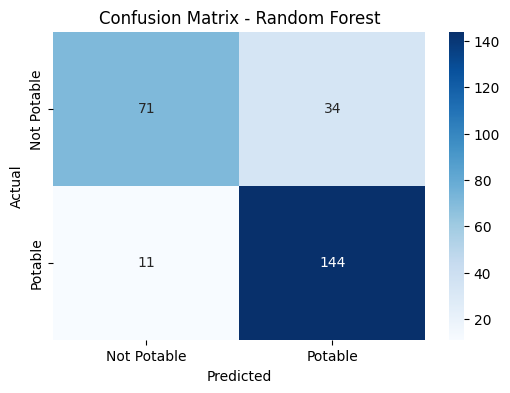


🌟 Feature Importance:
ph: 0.1750
Hardness: 0.1088
Solids: 0.1119
Chloramines: 0.1219
Sulfate: 0.1318
Conductivity: 0.0905
Organic_carbon: 0.0814
Trihalomethanes: 0.0809
Turbidity: 0.0979


In [7]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the SMOTEENN resampled dataset
file = "resampled_SMOTEENN.csv"
print(f"\n📂 Dataset: {file}")
df = pd.read_csv(file)

# Separate features and target
X = df.drop("Potability", axis=1)
y = df["Potability"]

# Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"✅ Accuracy: {accuracy:.4f}")

# Classification Report
print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\n🔴 Confusion Matrix:")
print(cm)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Potable", "Potable"], yticklabels=["Not Potable", "Potable"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()

# Feature Importance
feature_importance = rf.feature_importances_
print("\n🌟 Feature Importance:")
for feature, importance in zip(X.columns, feature_importance):
    print(f"{feature}: {importance:.4f}")


RF Hyper tuning


📂 Dataset: resampled_SMOTEENN.csv
🔧 Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
✅ Accuracy: 0.8192

📊 Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.68      0.75       105
           1       0.81      0.92      0.86       155

    accuracy                           0.82       260
   macro avg       0.83      0.80      0.80       260
weighted avg       0.82      0.82      0.81       260


🔴 Confusion Matrix:
[[ 71  34]
 [ 13 142]]


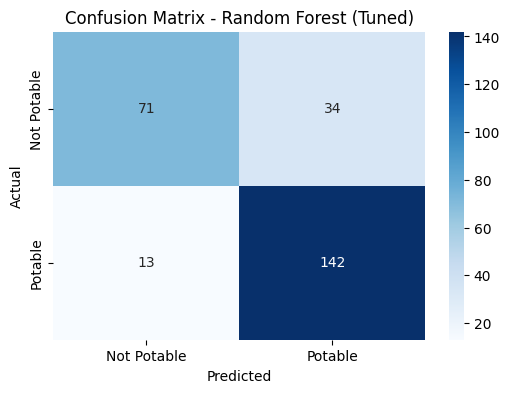

In [8]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load only SMOTEENN dataset
file = "resampled_SMOTEENN.csv"
print(f"\n📂 Dataset: {file}")

# Load the dataset
df = pd.read_csv(file)

# Separate features and target
X = df.drop("Potability", axis=1)
y = df["Potability"]

# Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameters for tuning
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20],
    'min_samples_split': [2],
    'min_samples_leaf': [1]
}

# Initialize Random Forest
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

# GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=2, n_jobs=-1, verbose=0)
grid_search.fit(X_train, y_train)

# Best model
best_rf = grid_search.best_estimator_
print("🔧 Best Parameters:", grid_search.best_params_)

# Make predictions
y_pred = best_rf.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"✅ Accuracy: {accuracy:.4f}")

# Classification report
print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\n🔴 Confusion Matrix:")
print(cm)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Potable", "Potable"], yticklabels=["Not Potable", "Potable"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest (Tuned)')
plt.show()


KNN

✅ Accuracy: 0.8346

📊 Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.68      0.77       105
           1       0.81      0.94      0.87       155

    accuracy                           0.83       260
   macro avg       0.85      0.81      0.82       260
weighted avg       0.84      0.83      0.83       260


🔴 Confusion Matrix:
[[ 71  34]
 [  9 146]]


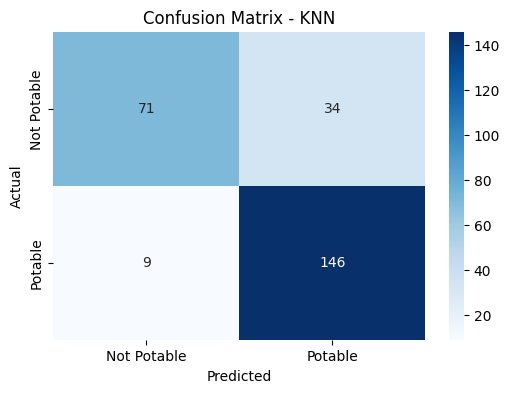

In [9]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load only SMOTEENN resampled dataset
df = pd.read_csv("resampled_SMOTEENN.csv")

# Separate features and target
X = df.drop("Potability", axis=1)
y = df["Potability"]

# Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize KNN with default parameters (no hyperparameter tuning)
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Predictions
y_pred = knn.predict(X_test)

# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"✅ Accuracy: {accuracy:.4f}")

# Classification Report
print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\n🔴 Confusion Matrix:")
print(cm)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Not Potable", "Potable"],
            yticklabels=["Not Potable", "Potable"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - KNN')
plt.show()


KNN tuning



📂 Dataset: resampled_SMOTEENN.csv
🔧 Best Parameters: {'n_neighbors': 3, 'p': 2, 'weights': 'distance'}
✅ Accuracy: 0.8769

📊 Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.78      0.84       105
           1       0.86      0.94      0.90       155

    accuracy                           0.88       260
   macro avg       0.88      0.86      0.87       260
weighted avg       0.88      0.88      0.88       260


🔴 Confusion Matrix:
[[ 82  23]
 [  9 146]]


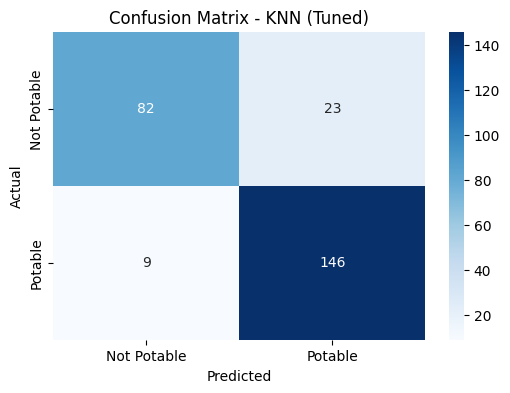

In [10]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Only use SMOTEENN dataset
file = "resampled_SMOTEENN.csv"
print(f"\n📂 Dataset: {file}")

# Load the dataset
df = pd.read_csv(file)

# Separate features and target
X = df.drop("Potability", axis=1)
y = df["Potability"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter grid for KNN
param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # p=1: Manhattan, p=2: Euclidean
}

# Initialize KNN
knn = KNeighborsClassifier()

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=2, n_jobs=-1, verbose=0)
grid_search.fit(X_train, y_train)

# Best model
best_knn = grid_search.best_estimator_
print(f"🔧 Best Parameters: {grid_search.best_params_}")

# Predict on test data
y_pred = best_knn.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"✅ Accuracy: {accuracy:.4f}")

# Classification report
print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\n🔴 Confusion Matrix:")
print(cm)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Potable", "Potable"], yticklabels=["Not Potable", "Potable"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - KNN (Tuned)')
plt.show()


✅ Ensemble Accuracy: 0.8462

📊 Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.69      0.78       105
           1       0.82      0.95      0.88       155

    accuracy                           0.85       260
   macro avg       0.86      0.82      0.83       260
weighted avg       0.86      0.85      0.84       260


🔴 Confusion Matrix:
[[ 72  33]
 [  7 148]]


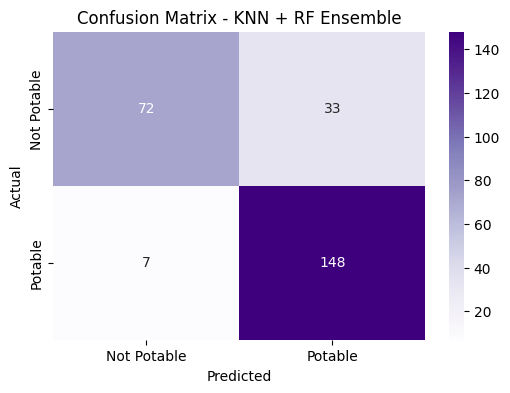

In [11]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load only SMOTEENN resampled dataset
df = pd.read_csv("resampled_SMOTEENN.csv")

# Separate features and target
X = df.drop("Potability", axis=1)
y = df["Potability"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define base models
knn = KNeighborsClassifier()  # Default: n_neighbors=5
rf = RandomForestClassifier(random_state=42)  # Default: 100 trees

# Create VotingClassifier ensemble
ensemble = VotingClassifier(estimators=[('knn', knn), ('rf', rf)], voting='soft')  # use 'hard' if preferred
ensemble.fit(X_train, y_train)

# Predict
y_pred = ensemble.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f"✅ Ensemble Accuracy: {accuracy:.4f}")
print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\n🔴 Confusion Matrix:")
print(cm)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Purples",
            xticklabels=["Not Potable", "Potable"],
            yticklabels=["Not Potable", "Potable"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - KNN + RF Ensemble")
plt.show()
